# Exercises

**2.** 
Implement an unsharp masking operation (http://en.wikipedia.org/wiki/Unsharp_masking) by blurring an image and then subtracting the blurred version from the original. This gives a sharpening effect to the image. Try this on both color and grayscale images.

Para obtener una imagen realzada, tal como se señala en el enlace, se puede seguir la siguiente expresión: *sharpened = original + (original − blurred) × amount*. Siendo *amount* un valor arbitrario que haga que se vea bien la imagen de salida. Y *blurred* es el resultado de aplicar un filtro Gaussiano a la imagen original. Sabiendo esto y usando la siguiente imagen de prueba tenemos:

![](data\eye.jpg)

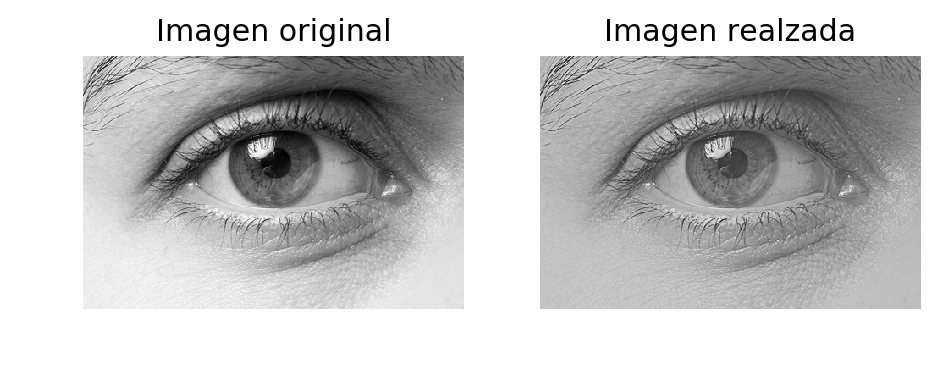

In [1]:
from matplotlib import pyplot as plt
from scipy.ndimage import filters
from PIL import Image
import numpy as np

gray = np.array(Image.open('data/eye.jpg').convert('L'),'f')
gray_blurred = filters.gaussian_filter(gray,3) #Usando un Gaussiano con sigma de 3
sharpened_gray = gray+(gray-gray_blurred)*0.8

plt.figure(dpi=180)
plt.subplot(121), plt.imshow(gray,cmap='gray'), plt.axis('off')
plt.title('Imagen original')

plt.subplot(122), plt.imshow(sharpened_gray,cmap='gray'), plt.axis('off')
plt.title('Imagen realzada')
plt.show()

Realizando este mismo proceso pero ahora para la imagen a color, tenemos:

In [2]:
im = np.array(Image.open('data/eye.jpg'),'f')
im_blurred = filters.gaussian_filter(im,3)
sharpened_im = im + (im - im_blurred)*0.8

Para efectos de visualización, como la función *imshow* del módulo *pyplot* no es capaz de ajustar la imagen de salida al rango de valores de la matriz que se desea mostrar, vamos a ajustar este rango manualmente para valores entre 0 y 255.

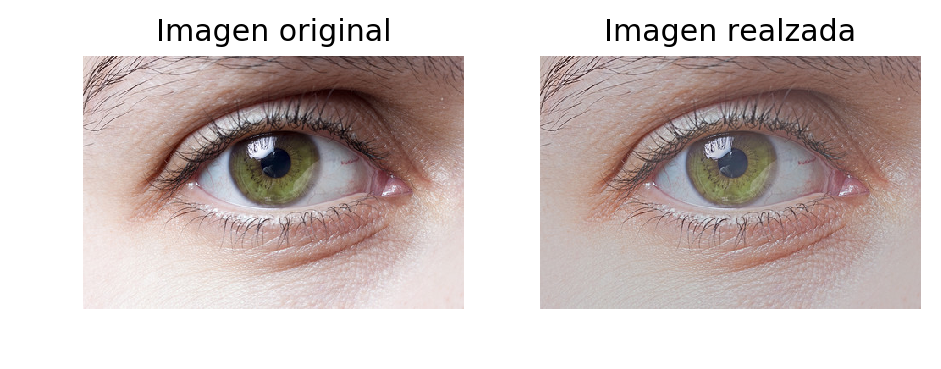

In [3]:
I = sharpened_im-sharpened_im.min()
I = I/I.max()*255

plt.figure(dpi=180)
plt.subplot(121), plt.imshow(np.uint8(im)), plt.axis('off')
plt.title('Imagen original')

plt.subplot(122), plt.imshow(np.uint8(I)), plt.axis('off')
plt.title('Imagen realzada')
plt.show()